In [ ]:
# create land/ocean mask
# read a mask.nc file (the grid is the "union" of SHiELD forecast and the ERA5 reanalysis) 
# and create a land/ocean mask for this "union grid"

# This has been transformed to py at
# /scratch2/GFDL/gfdlscr/Chih-Chi.Hu/forecast_verification_ERA5/land_ocean_mask/create_ocean_land_mask.py

# initial built: 2025/01/23

from global_land_mask import globe
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import netCDF4 as nc
import os, shutil, sys


In [2]:
workdir = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/forecast_verification_ERA5/land_ocean_mask'

# a sample forecast file:
input_nc = '/scratch2/GFDL/gfdlscr/Chih-Chi.Hu/forecast_verification_ERA5/land_ocean_mask/mask.nc'

# output names:
fn_ocean = f'{workdir}/mask_ocean.nc'
fn_land  = f'{workdir}/mask_land.nc'

In [3]:
fcst = xr.load_dataset(input_nc)

In [4]:
lev = fcst.level.values
lat = fcst.latitude.values
lon = fcst.longitude.values

In [5]:
# create land/ocean mask arrays:
lats, lons = np.meshgrid(lat,lon)

lon_shift = lon.copy()
for i, llon in enumerate(lon_shift):
    if llon > 180:
        lon_shift[i] = lon[i] - 360
        
lats, lons_shift = np.meshgrid(lat, lon_shift)

ocean_mask = globe.is_ocean(lats, lons_shift)
land_mask  = globe.is_land(lats, lons_shift)

land_mask_levs  = np.tile(land_mask.T,  (len(lev), 1, 1)) 
ocean_mask_levs = np.tile(ocean_mask.T, (len(lev), 1, 1)) 

# Step 4: Wrap the mask in an xarray.DataArray
land_mask_da = xr.DataArray(
    data=land_mask_levs,
    coords={"level": lev, "latitude": lat, "longitude": lon},
    dims=("level", "latitude", "longitude"),
    name="land_mask_da"
)

ocean_mask_da = xr.DataArray(
    data=ocean_mask_levs,
    coords={"level": lev, "latitude": lat, "longitude": lon},
    dims=("level", "latitude", "longitude"),
    name="ocean_mask_da"
)

In [6]:
# save the arrays into nc files:
ocean_mask_da.to_netcdf(fn_ocean)
land_mask_da.to_netcdf(fn_land)

In [28]:
temp = fcst.mask.where(land_mask_da)

In [32]:
temp2 = temp.where(temp)

In [31]:
mask

NameError: name 'mask' is not defined

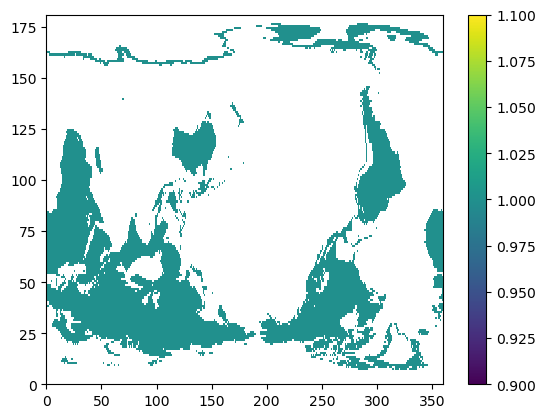

In [33]:
plt.pcolormesh(temp2[23,:,:])
plt.colorbar()